# Logistic Regression: Dinosaur Type Classification

In this work, we aim to classify different types of dinosaurs using logistic regression. We will utilize features to train a logistic regression model that can predict the dinosaur type.

we generate synthetic data for three dinosaur types: TREX, Spinosaurus, and Triceratops. 
Our dataset will contain 2000 dinosaurs and 5 features:
* Type: Type of dinasour (TREX, Spinosaurus or Triceratops)
* Head Size: Head size of dinasour (meter)
* Teeth Size: Teeth size of dinasour (cm)
* Length: Length of dinasour (meter)
* Weight: Weight of dinasour (kg)

Each dinosaur type in our dataset will be carefully generated with specific mean and standard deviations based on extensive research. This approach ensures that we produce a substantial amount of synthetic data that accurately represents the diversity and characteristics of each dinosaur type. By incorporating these scientifically derived values, we can create a robust and reliable dataset to apply machine learning algorithms effectively for dinosaur type classification. 

### 1. Import Modules

In [1]:
# Data Science and visualization modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn related methods. Needed to apply logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Needed to visualize boundaries of logistic regression
from mlxtend.plotting import plot_decision_regions

### 2. Dataset

In [2]:
# Set the seed for reproducibility
np.random.seed(42)

data = pd.DataFrame()

# TREX data
data['Type'] = ['TREX'] * 2500
data['Head_Size'] = np.random.normal(1.5, 0.1, 2500)
data['Teeth_Size'] = np.random.normal(20, 3, 2500)
data['Dinosaur_Length'] = np.random.normal(11, 1, 2500)
data['Weight'] = np.random.normal(6600, 700, 2500)
data['Gender'] = np.random.choice(['Male', 'Female'], size=2500, replace=True)


# Spinosaurus data
spinosaurs_data = pd.DataFrame()
spinosaurs_data['Type'] = ['Spinosaurus'] * 1600
spinosaurs_data['Head_Size'] = np.random.normal(1.5, 0.1, 1600)
spinosaurs_data['Teeth_Size'] = np.random.normal(15, 2, 1600)
spinosaurs_data['Dinosaur_Length'] = np.random.normal(13, 1, 1600)
spinosaurs_data['Weight'] = np.random.normal(9000, 1000, 1600)
spinosaurs_data['Gender'] = np.random.choice(['Male', 'Female'], size=1600, replace=True)

# Triceratops data
triceratops_data = pd.DataFrame()
triceratops_data['Type'] = ['Triceratops'] * 2000
triceratops_data['Head_Size'] = np.random.normal(2, 0.1, 2000)
triceratops_data['Teeth_Size'] = np.random.normal(18, 3, 2000)
triceratops_data['Dinosaur_Length'] = np.random.normal(8, 1, 2000)
triceratops_data['Weight'] = np.random.normal(7500, 700, 2000)
triceratops_data['Gender'] = np.random.choice(['Male', 'Female'], size=2000, replace=True)

# Concatenate the data for all dinosaur types
data = pd.concat([data, spinosaurs_data, triceratops_data], ignore_index=True)

# Shuffle the DataFrame
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


#Create target column

data['Class'] = data['Type'].map({'TREX': 1, 'Spinosaurus': 2, 'Triceratops': 3})
data
df = np.round(data, 2)

Now that our dataset is prepared, let's examine the first five rows to get a glimpse of its contents:

In [3]:
df.head()

,Type,Head_Size,Teeth_Size,Dinosaur_Length,Weight,Gender,Class
0,Spinosaurus,1.44,15.27,13.31,8183.39,Female,2
1,Spinosaurus,1.55,16.38,13.16,8290.08,Male,2
2,Triceratops,1.91,17.16,8.76,8212.46,Male,3
3,TREX,1.42,15.25,11.71,6722.90,Female,1
4,Triceratops,2.13,16.44,6.40,7911.30,Female,3


we can use `pandas.info()` to print information about the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6100 entries, 0 to 6099
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             6100 non-null   object 
 1   Head_Size        6100 non-null   float64
 2   Teeth_Size       6100 non-null   float64
 3   Dinosaur_Length  6100 non-null   float64
 4   Weight           6100 non-null   float64
 5   Gender           6100 non-null   object 
 6   Class            6100 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 333.7+ KB


With our dataframe prepared, our initial step will involve **exploratory data analysis** before proceeding to apply logistic regression.

### 3. Exploratory Data Analysis

Let's start by checking if there are any `NaN` values in our DataFrame.

In [5]:
df.isnull().values.any()

False

Given that there are no NaN values present in our DataFrame, we can proceed with conducting a more comprehensive inspection of the dataset.

We can count the various dinosaur species by their genders

<Axes: xlabel='Type', ylabel='count'>

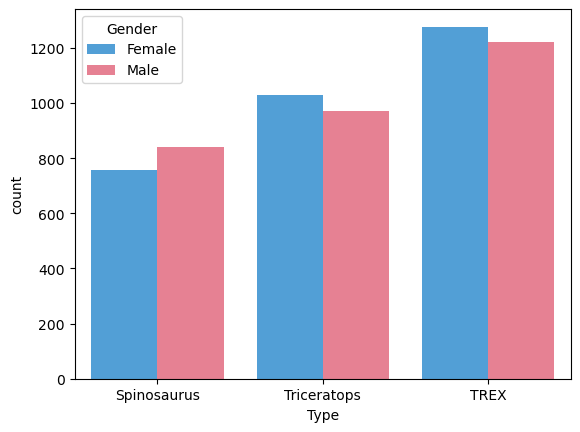

In [6]:
colors = sns.color_palette('husl', 9)
colors = [colors[6], colors[0]]

sns.countplot(x='Type', hue='Gender', data=df, palette=colors)

From the visualization, it is evident that the number of dinosaurs by type follows the order of TREX > Triceratops > Spinosaurus.

To obtain the total number of dinosaurs in our dataframe, we can use the `pandas.DataFrame.shape` method, which will show us the number of rows and columns in our dataset. As we are aware, the number of rows is equivalent to the total number of dinosaurs.

In [7]:
df.shape

(6100, 7)

We can go beyond that and for instance, we can utilize `seaborn.displot` to illustrate the distribution of head size data and observe how it varies based on the type of dinosaur.

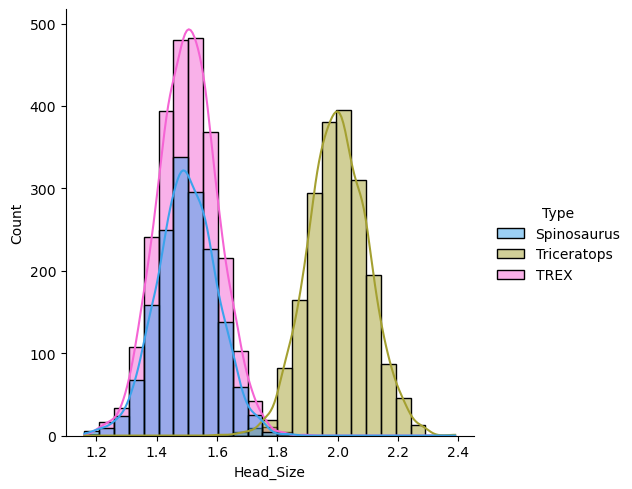

In [8]:
colors = sns.color_palette('husl', 9)
colors = [colors[6], colors[2], colors[8]]

sns.displot(data=df, x='Head_Size', hue='Type', kde=True, palette=colors)

In this analysis, we observe that the head sizes of TREX and Spinosaurus appear similar, despite having different total counts in the dataset. On the contrary, Triceratops exhibits significantly larger head sizes compared to the other two dinosaur types.

Certainly, we can delve deeper into the analysis by employing boxplots and violin plots to visualize the relationships between all the features available in our dataset, with respect to different dinosaur types. These plots will provide a comprehensive understanding of how various features vary across the different types of dinosaurs.

Using boxplots, as we explained, we can visualize the variations in features based on the type of the dinosaur. This graphical method provides a concise summary of the data, showcasing the median, quartiles, and potential outliers.

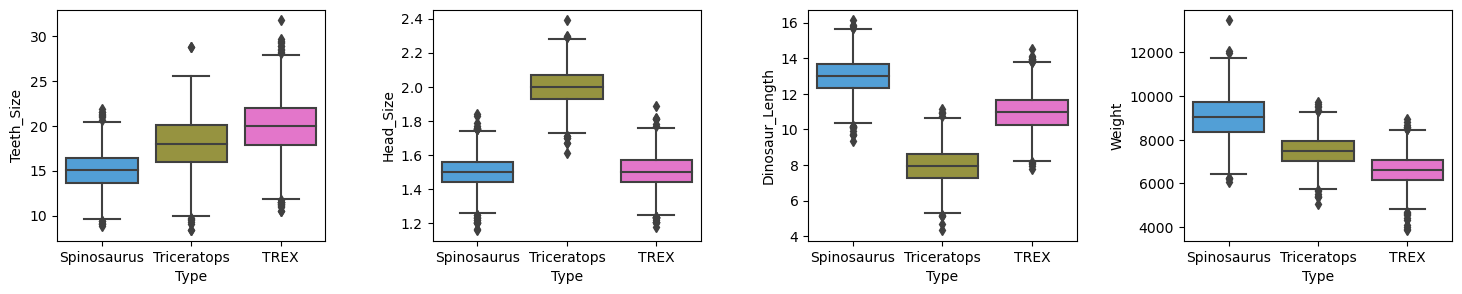

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 3))

colors = sns.color_palette('husl', 9)
colors = [colors[6], colors[2], colors[8]]

sns.boxplot(data=df, x='Type', y='Teeth_Size', ax=ax1, palette=colors)
sns.boxplot(data=df, x='Type', y='Head_Size', ax=ax2, palette=colors)
sns.boxplot(data=df, x='Type', y='Dinosaur_Length', ax=ax3, palette=colors)
sns.boxplot(data=df, x='Type', y='Weight', ax=ax4, palette=colors)

fig.subplots_adjust(wspace=0.4)

A violin plot on the other hand, is a data visualization that combines a kernel density plot with a mirrored boxplot. It shows the data's probability density at different values, offering insights into the distribution's characteristics. Unlike boxplots, violin plots provide a more detailed view of data concentration and spread, making them particularly useful for comparing multiple groups or variables.

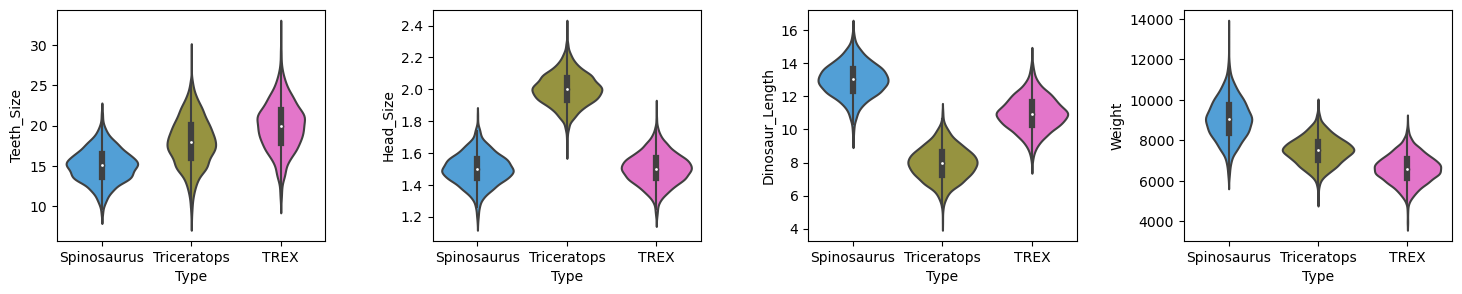

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 3))

sns.violinplot(data=df, x='Type', y='Teeth_Size', ax=ax1, palette=colors)
sns.violinplot(data=df, x='Type', y='Head_Size', ax=ax2, palette=colors)
sns.violinplot(data=df, x='Type', y='Dinosaur_Length', ax=ax3, palette=colors)
sns.violinplot(data=df, x='Type', y='Weight', ax=ax4, palette=colors)

fig.subplots_adjust(wspace=0.4)

We can use `seaborn.pairplot` to visualize how the features we intend to use for training dataset differ based on the type of dinosaur.

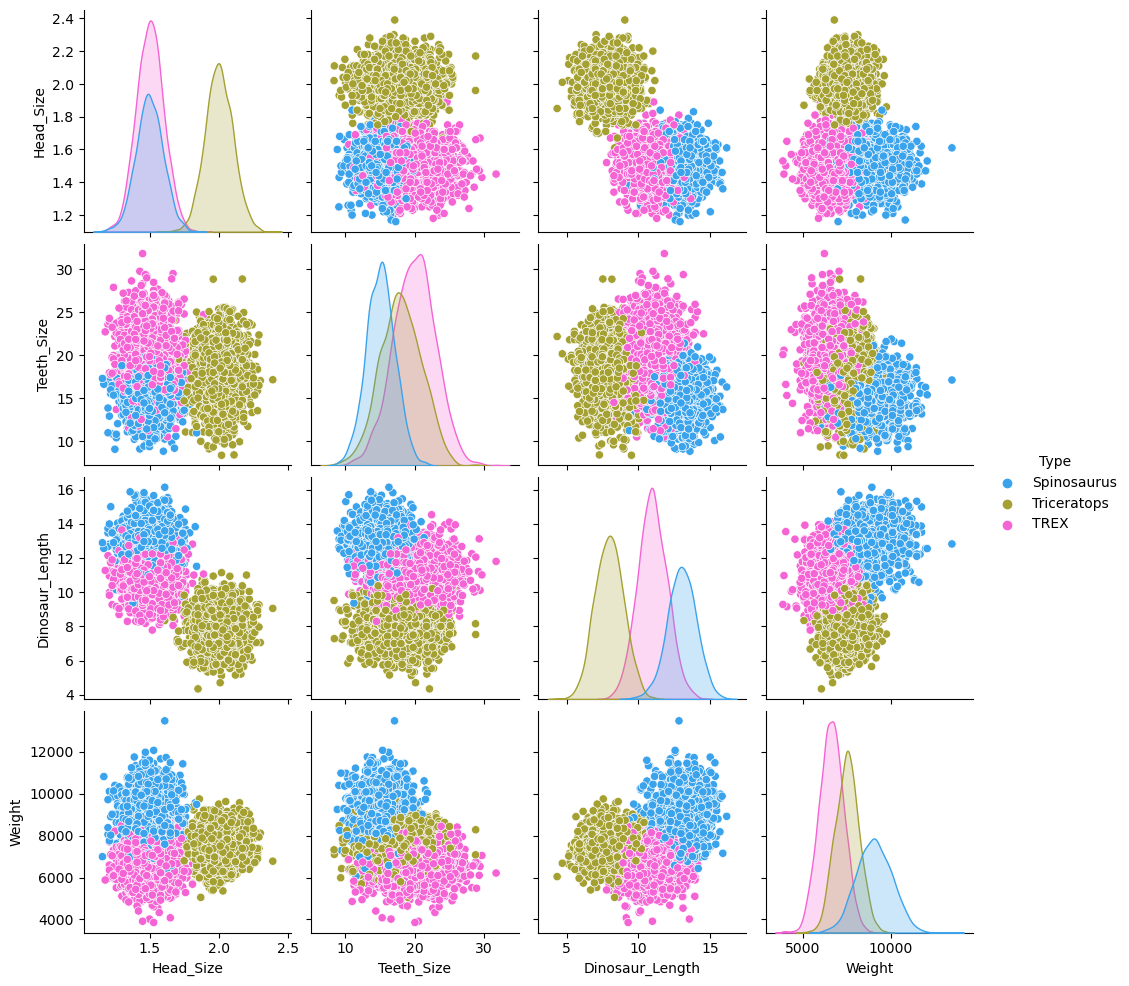

In [11]:
df_pairplot = df[['Type', 'Head_Size', 'Teeth_Size', 'Dinosaur_Length', 'Weight']]
sns.pairplot(df_pairplot, hue='Type', palette=colors)

### Logistic Regression

We initiate the process by dividing our data into a training set and a test set.

In [12]:
df_input = df.drop(columns=['Type', 'Class', 'Gender'], axis=1) # features
df_target = df['Class'] # target

# Train and test set
X_train, X_test, y_train, y_test = train_test_split(df_input, df_target, test_size=0.25,
                                                   random_state=21)

We perform data scaling to bring all the features to a similar scale.

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Next, we create the model and proceed with the fitting process.

In [14]:
LogReg = LogisticRegression(multi_class='ovr', max_iter=1000, C=1).fit(X_train, y_train)

Now, we can evaluate the performance of our model using the `score` method.

In [15]:
print('Training set score: {}'.format(round(LogReg.score(X_train, y_train), 3)))
print('Test set score: {}'.format(round(LogReg.score(X_test, y_test), 3)))

Training set score: 0.978
Test set score: 0.977


Our model demonstrates good performance on both the training and test sets.

#We can also make predictions. Let's choose a random dinasour from dataset and predict its type

In [16]:
LogReg.predict([X_test[0]])

array([1])

As per our previous assignment, we designated the label 1 for TREX. Consequently, based on our model's predictions, it identifies `X_test[0]` as TREX.

In the final step, we will visualize our model's performance by plotting decision boundaries for two features: **Weight** and **Dinosaur Length**.

<Axes: >

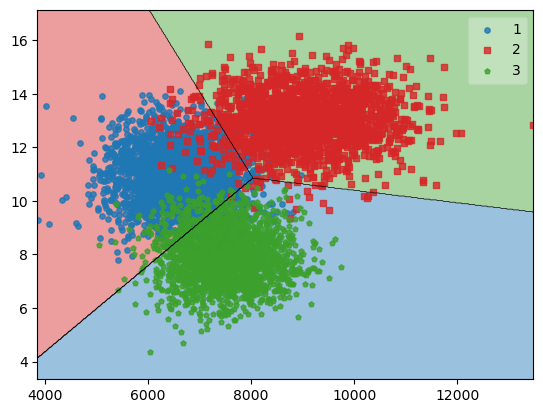

In [17]:
x = df[['Weight', 'Dinosaur_Length']].values
y = df['Class'].astype(int).values
scatter_kwargs = {'s': 15, 'edgecolor': None}

plot_decision_regions(x, y, LogisticRegression(max_iter=1000, C=1,multi_class='auto').fit(x,y),
                      legend=1, hide_spines=False, colors='#1f77b4,#d62728,#3ca02c',
                     markers=['o', 's', 'p'], scatter_kwargs=scatter_kwargs)